# **🍽️ Restaurant Tips Analysis**

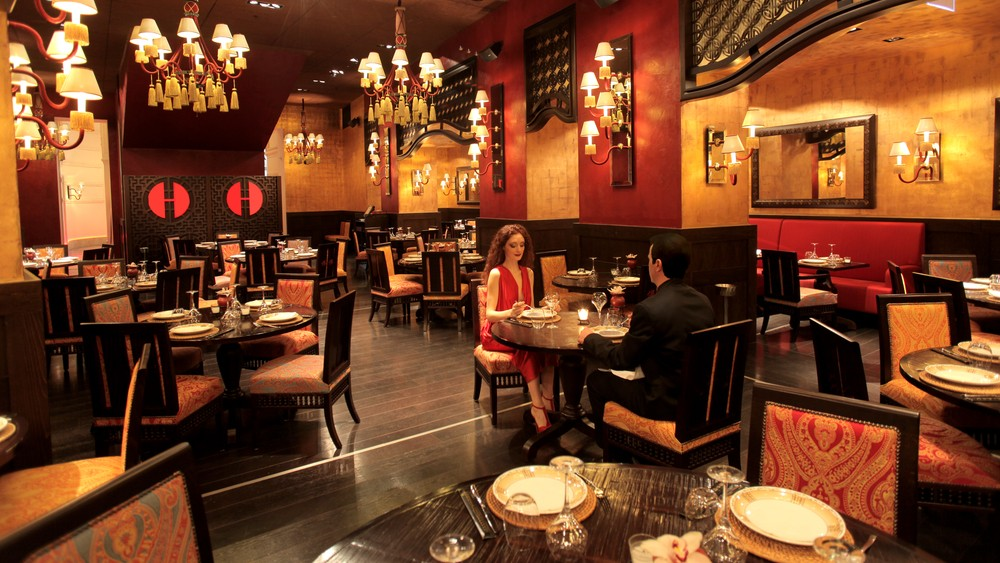

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [ ]:
df.describe()

,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


> **Ooops... 🤔**
>
> We have string columns considered as objects.

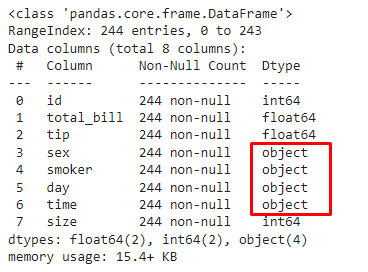

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df1 = df.convert_dtypes()


Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [14]:
# PUT YOUR CODE HERE
numeric = ['int16', 'int32', 'int64']
numeric_cols = df.select_dtypes(include=numeric)
numeric_cols.describe()

,id,size
count,244.000000,244.000000
mean,121.500000,2.569672
std,70.580923,0.951100
min,0.000000,1.000000
25%,60.750000,2.000000
50%,121.500000,2.000000
75%,182.250000,3.000000
max,243.000000,6.000000


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [22]:
# PUT YOUR CODE HERE
smokers_df = df.query('smoker == "Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [23]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
107,107,25.21,4.29,Male,Yes,Sat,Dinner,2
211,211,25.89,5.16,Male,Yes,Sat,Dinner,4
203,203,16.40,2.50,Female,Yes,Thur,Lunch,2
69,69,15.01,2.09,Male,Yes,Sat,Dinner,2
177,177,14.48,2.00,Male,Yes,Sun,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [19]:
# PUT YOUR CODE HERE
non_smokers_df = df.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [20]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
228,228,13.28,2.72,Male,No,Sat,Dinner,2
158,158,13.39,2.61,Female,No,Sun,Dinner,2
26,26,13.37,2.00,Male,No,Sat,Dinner,2
11,11,35.26,5.00,Female,No,Sun,Dinner,4
167,167,31.71,4.50,Male,No,Sun,Dinner,4


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [15]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
import numpy as np

# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max,smokers_tip_mean,smokers_tip_median]

# round all values in list to 4 decimal
# list(np.round(smokers_values,4))
smokers_values_rounded = ["%.4f" % i for i in smokers_values]

#make datafram from the rounded list
smoker_values_df = pd.DataFrame(smokers_values_rounded, index =['min', 'max', 'mean', 'median'])
smoker_values_df

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE

# tạo 1 list từ measures of central tendency
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]

# round it to 4 decimal:
non_smokers_values_rounded = ["%.4f" % j for j in non_smokers_values]

# turn into a dataframe:
non_smokers_values_df = pd.DataFrame(non_smokers_values_rounded, index = ['min','max','mean','median'])
non_smokers_values_df

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1 : In term of tip amount, Smokers group has higher tip amount, incomparison to average tip gave by all cusomters. $ 3.0 is the amount give by smokers the most.

2. Insight 2: On the other hand, non-smokers have lower average common tip amount, in comparison to Smoker ones. They normally spend $ 2.74 for tipping.

**General conclusion:** The number in tip amount between these 2 groups are slightly different. However, restaurant should not limit the services offer for the Smokers group since they seem to be more generous than the other one.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

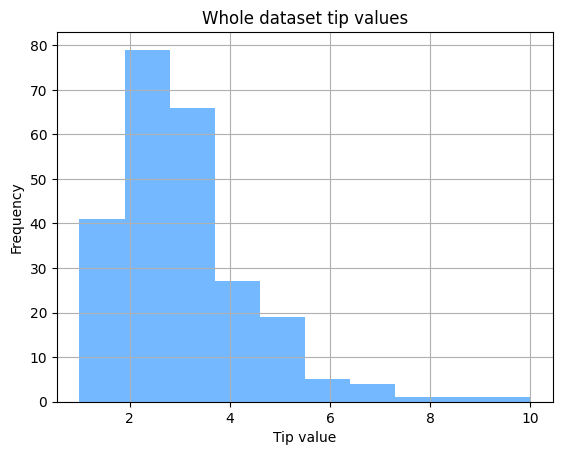

<Figure size 1500x500 with 0 Axes>

In [ ]:
# YOUR CODE
plt.hist(df.tip, bins=10, color='#74b9ff')

# set labels:
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

# show gridlines:
plt.grid(True)

# set size
plt.figure(figsize=(15,5))

#show histogram
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

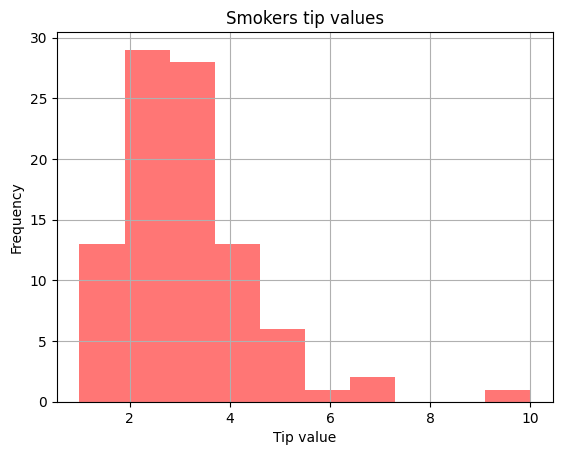

<Figure size 1500x500 with 0 Axes>

In [ ]:
# YOUR CODE
plt.hist(smokers_df.tip, bins=10, color='#ff7675')

# set labels:
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

# show gridlines:
plt.grid(True)

# set size
plt.figure(figsize=(15,5))

#show histogram
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

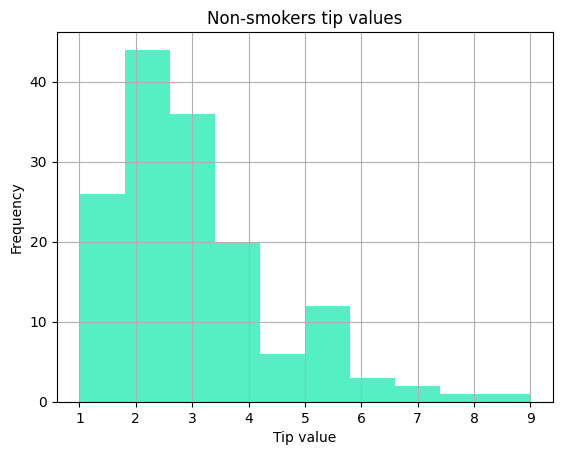

<Figure size 1500x500 with 0 Axes>

In [ ]:
# YOUR CODE
plt.hist(non_smokers_df.tip, bins=10, color='#55efc4')

# set labels:
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

# show gridlines:
plt.grid(True)

# set size
plt.figure(figsize=(15,5))

#show histogram
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

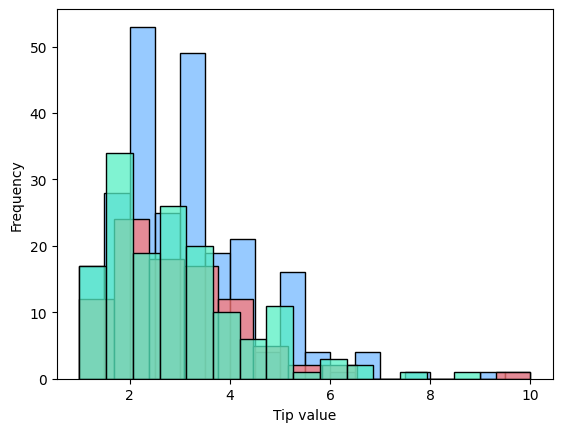

In [ ]:
# YOUR CODE
import seaborn as sns

data1 = df.tip
data2 = smokers_df.tip
data3 = non_smokers_df.tip

sns.histplot(data1, color='#74b9ff', label='Whole dataset tip values')
sns.histplot(data2, color='#ff7675', label='Smokers tip values')
sns.histplot(data3, color='#55efc4', label='Non-smokers tip values')

# SET LABLES:
plt.xlabel('Tip value')
plt.ylabel('Frequency')

plt.show()

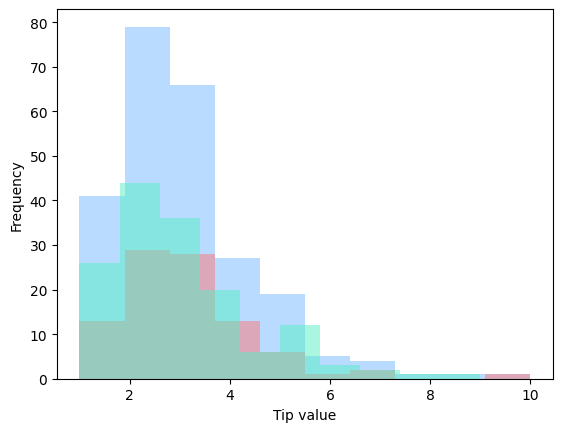

In [26]:
# display overlaping histograms in 1 cell
import seaborn as sns

data1 = df.tip
data2 = smokers_df.tip
data3 = non_smokers_df.tip

#sns.histplot(data1, color='#74b9ff', alpha=0.5, label='Whole dataset tip values')
#sns.histplot(data2, color='#ff7675', alpha=0.5, label='Smokers tip values')
#sns.histplot(data3, color='#55efc4', alpha=0.5, label='Non-smokers tip values')

plt.hist(data1, color='#74b9ff', alpha=0.5)
plt.hist(data2, color='#ff7675', alpha=0.5)
plt.hist(data3, color='#55efc4', alpha=0.5)

# SET LABLES:
plt.xlabel('Tip value')
plt.ylabel('Frequency')

plt.show()

<Axes: >

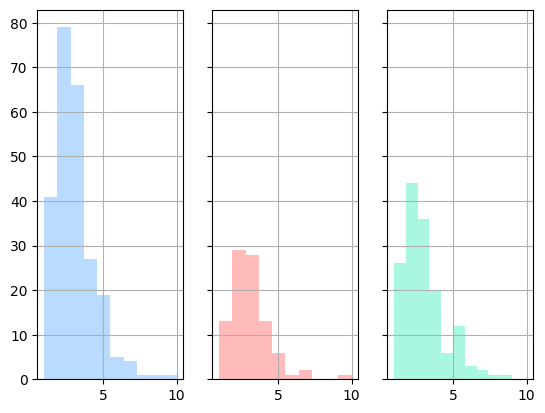

In [ ]:
#df.plot(subplots=True, layout=(3, 2))
#data1.hist()
#data2.hist()
#data3.hist()

# display 3 histogram side-by-side , sharing x-axis and sharing y-axis:
fig, axs = plt.subplots(1,3, sharex='all', sharey=True)

data1.hist(ax=axs[0], color='#74b9ff', alpha=0.5)
data2.hist(ax=axs[1], color='#ff7675', alpha=0.5)
data3.hist(ax=axs[2], color='#55efc4', alpha=0.5)


#for i in range(1):
#  for j in range(3):
#    axs[i,j].plt.text(0.5,0.5,str(j), fontssize=18, ha='center')

#fig

#plt.figure(dpi=120)


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [ ]:
female_df = df.query('sex == "Female"')

In [ ]:
female_df.describe()

,id,total_bill,tip,size
count,87.000000,87.000000,87.000000,87.000000
mean,128.080460,18.056897,2.833448,2.459770
std,65.468121,8.009209,1.159495,0.937644
min,0.000000,3.070000,1.000000,1.000000
25%,83.500000,12.750000,2.000000,2.000000
50%,131.000000,16.400000,2.750000,2.000000
75%,182.000000,21.520000,3.500000,3.000000
max,243.000000,44.300000,6.500000,6.000000


In [ ]:
# Min, max, mean, median of female_df

female_tip_min = female_df['tip'].min()
female_tip_max = female_df['tip'].max()
female_tip_mean = female_df['tip'].mean()
female_tip_median = female_df['tip'].median()

#female_tip_min
#female_tip_max
#female_tip_mean
#female_tip_median

In [ ]:
# tạo list cho female_df ana
female_tip_list = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
pd.DataFrame(['%.4f' % l for l in female_tip_list], index=['min','max', 'mean', 'median'])

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [ ]:
# Male df:

male_df = df.query('sex == "Male"')

In [ ]:
male_df.describe()

,id,total_bill,tip,size
count,157.000000,157.000000,157.000000,157.000000
mean,117.853503,20.744076,3.089618,2.630573
std,73.208853,9.246469,1.489102,0.955997
min,1.000000,7.250000,1.000000,1.000000
25%,53.000000,14.000000,2.000000,2.000000
50%,110.000000,18.350000,3.000000,2.000000
75%,182.000000,24.710000,3.760000,3.000000
max,242.000000,50.810000,10.000000,6.000000


In [ ]:
# Min, max, mean, median of male_df

male_tip_min = male_df['tip'].min()
male_tip_max = male_df['tip'].max()
male_tip_mean = male_df['tip'].mean()
male_tip_median = male_df['tip'].median()

In [ ]:
# tạo list cho male_df ana
male_tip_list = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
pd.DataFrame(['%.4f' % l for l in male_tip_list], index=['min','max', 'mean', 'median'])

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [ ]:
all_vals_dict2 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Female_tip': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median},
    'Male_tip': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median}
}

# Make a dataframe
all_mct2 = pd.DataFrame(all_vals_dict2)
# Output the dataframe
all_mct2

,Common,Female_tip,Male_tip
min,1.000000,1.000000,1.000000
max,6.500000,6.500000,10.000000
mean,2.833448,2.833448,3.089618
median,2.750000,2.750000,3.000000


<Axes: >

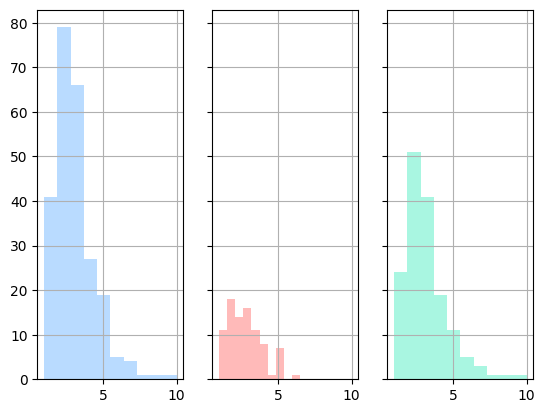

In [ ]:
# display 3 histogram (commoon, female & male) side-by-side , sharing x-axis and sharing y-axis:
fig, axs = plt.subplots(1,3, sharex='all', sharey=True)

data_female = female_df.tip
data_male = male_df.tip

data1.hist(ax=axs[0], color='#74b9ff', alpha=0.5)
data_female.hist(ax=axs[1], color='#ff7675', alpha=0.5)
data_male.hist(ax=axs[2], color='#55efc4', alpha=0.5)

<Axes: >

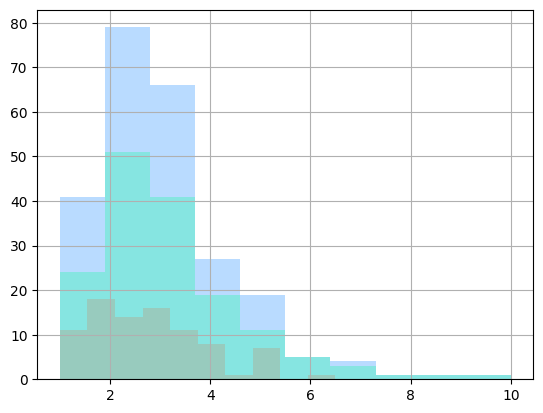

In [ ]:

data1.hist(color='#74b9ff', alpha=0.5)
data_female.hist(color='#ff7675', alpha=0.5)
data_male.hist(color='#55efc4', alpha=0.5)

###Insight:
Male customers tend to give higher tips; and they tend to tip more frequently when they use the service, in comparison to Female customers.

### **📆 Do weekends bring more tips?**

In [ ]:
# so sánh weeknd_df vs weekday_df vs common_tip
weeknd_df = df.query("day in ('Sat','Sun')")
weeknd_df

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
238,238,35.83,4.67,Female,No,Sat,Dinner,3
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
weeknd_df.describe()

,id,total_bill,tip,size
count,163.000000,163.000000,163.000000,163.000000
mean,112.012270,20.893006,3.115276,2.668712
std,78.009179,9.168543,1.461296,0.923327
min,0.000000,3.070000,1.000000,1.000000
25%,40.500000,14.605000,2.000000,2.000000
50%,106.000000,18.350000,3.000000,2.000000
75%,179.500000,25.285000,3.695000,3.000000
max,242.000000,50.810000,10.000000,6.000000


In [ ]:
weeknd_tip_min = weeknd_df['tip'].min()
weeknd_tip_max = weeknd_df['tip'].max()
weeknd_tip_mean = weeknd_df['tip'].mean()
weeknd_tip_median = weeknd_df['tip'].median()

In [ ]:
# tạo list cho weeknd_df ana
weeknd_tip_list = [weeknd_tip_min, weeknd_tip_max, weeknd_tip_mean, weeknd_tip_median]
pd.DataFrame(['%.4f' % m for m in weeknd_tip_list], index=['min','max', 'mean', 'median'])

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [ ]:
weekday_df = df.query("day != 'Sat' and day != 'Sun'")
weekday_df

,id,total_bill,tip,sex,smoker,day,time,size
77,77,27.20,4.00,Male,No,Thur,Lunch,4
78,78,22.76,3.00,Male,No,Thur,Lunch,2
79,79,17.29,2.71,Male,No,Thur,Lunch,2
80,80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...,...
223,223,15.98,3.00,Female,No,Fri,Lunch,3
224,224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,225,16.27,2.50,Female,Yes,Fri,Lunch,2
226,226,10.09,2.00,Female,Yes,Fri,Lunch,2


In [ ]:
weekday_df.describe()

,id,total_bill,tip,size
count,81.000000,81.000000,81.000000,81.000000
mean,140.592593,17.558148,2.762840,2.370370
std,47.500731,7.936160,1.186163,0.980363
min,77.000000,5.750000,1.000000,1.000000
25%,97.000000,12.260000,2.000000,2.000000
50%,132.000000,15.980000,2.500000,2.000000
75%,193.000000,20.530000,3.400000,2.000000
max,243.000000,43.110000,6.700000,6.000000


In [ ]:
weekday_tip_min = weekday_df['tip'].min()
weekday_tip_max = weekday_df['tip'].max()
weekday_tip_mean = weekday_df['tip'].mean()
weekday_tip_median = weekday_df['tip'].median()

In [ ]:
# tạo list cho weekday_df ana
weekday_tip_list = [weekday_tip_min, weekday_tip_max, weekday_tip_mean, weekday_tip_median]
pd.DataFrame(['%.4f' % n for n in weekday_tip_list], index=['min','max', 'mean', 'median'])

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


In [ ]:
all_vals_dict3 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weeknd_tip': {'min': weeknd_tip_min, 'max': weeknd_tip_max, 'mean': weeknd_tip_mean, 'median': weeknd_tip_median},
    'Weekday_tip': {'min': weekday_tip_min, 'max': weekday_tip_max, 'mean': weekday_tip_mean, 'median': weekday_tip_median}
}

# Make a dataframe
all_mct3 = pd.DataFrame(all_vals_dict3)
# Output the dataframe
all_mct3

,Common,Weeknd_tip,Weekday_tip
min,1.000000,1.000000,1.00000
max,6.500000,10.000000,6.70000
mean,2.833448,3.115276,2.76284
median,2.750000,3.000000,2.50000


<Axes: >

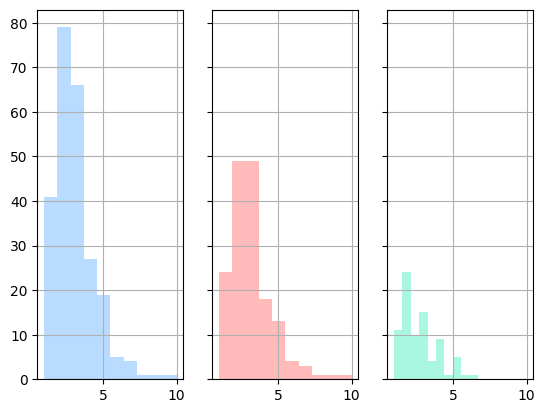

In [ ]:
# display 3 histogram (common, weeknd & weekday) side-by-side , sharing x-axis and sharing y-axis:
fig, axs = plt.subplots(1,3, sharex='all', sharey=True)

data_weeknd = weeknd_df.tip
data_weekday = weekday_df.tip

data1.hist(ax=axs[0], color='#74b9ff', alpha=0.5)
data_weeknd.hist(ax=axs[1], color='#ff7675', alpha=0.5)
data_weekday.hist(ax=axs[2], color='#55efc4', alpha=0.5)

<Axes: >

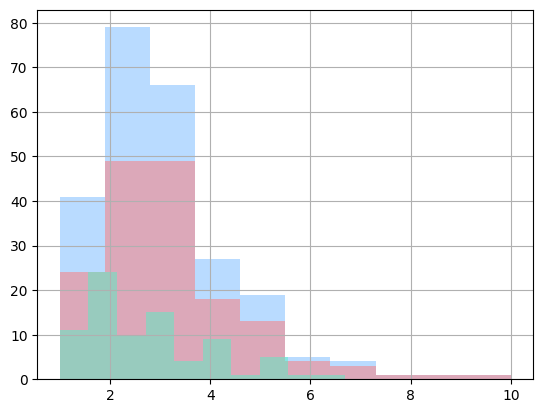

In [ ]:
data1.hist(color='#74b9ff', alpha=0.5)
data_weeknd.hist(color='#ff7675', alpha=0.5)
data_weekday.hist(color='#55efc4', alpha=0.5)

Insight: The restaurant will gain more tips on weekend, in deed. The difference in amount of tips received in weeknd is extreme. Restaurant owners should think about solutions to increase the occupancy in weekends to take advantage of this point.  

Perform the same steps based on the column **day**.

### **🕑 Do dinners bring more tips?**

In [3]:
dinner_df = df.query('time == "Dinner"')

In [4]:
dinner_df.describe()

,id,total_bill,tip,size
count,176.000000,176.000000,176.000000,176.000000
mean,111.630682,20.797159,3.102670,2.630682
std,75.833916,9.142029,1.436243,0.910241
min,0.000000,3.070000,1.000000,1.000000
25%,43.750000,14.437500,2.000000,2.000000
50%,100.500000,18.390000,3.000000,2.000000
75%,177.250000,25.282500,3.687500,3.000000
max,243.000000,50.810000,10.000000,6.000000


In [5]:
# Min, max, mean, median of dinner_df

dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

In [11]:
# tạo list cho dinner_df ana
dinner_tip_list = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
pd.DataFrame(['%.4f' % o for o in dinner_tip_list], index=['min','max', 'mean', 'median'])

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


In [7]:
other_meal_df = df.query('time != "Dinner"')

In [8]:
other_meal_df.describe()

,id,total_bill,tip,size
count,68.000000,68.000000,68.000000,68.000000
mean,147.044118,17.168676,2.728088,2.411765
std,46.141390,7.713882,1.205345,1.040024
min,77.000000,7.510000,1.250000,1.000000
25%,120.750000,12.235000,2.000000,2.000000
50%,137.500000,15.965000,2.250000,2.000000
75%,195.250000,19.532500,3.287500,2.000000
max,226.000000,43.110000,6.700000,6.000000


In [9]:
# Min, max, mean, median of other_meal_df

other_meal_tip_min = other_meal_df['tip'].min()
other_meal_tip_max = other_meal_df['tip'].max()
other_meal_tip_mean = other_meal_df['tip'].mean()
other_meal_tip_median = other_meal_df['tip'].median()

In [12]:
# tạo list cho other_meal_df ana
other_meal_tip_list = [other_meal_tip_min, other_meal_tip_max, other_meal_tip_mean, other_meal_tip_median]
pd.DataFrame(['%.4f' % p for p in other_meal_tip_list], index=['min','max', 'mean', 'median'])

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


In [16]:
# comparison 3 df:
all_vals_dict4 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinner_tip': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Other_meal_tip': {'min': other_meal_tip_min, 'max': other_meal_tip_max, 'mean': other_meal_tip_mean, 'median': other_meal_tip_median}
}

# Make a dataframe
all_mct4 = pd.DataFrame(all_vals_dict4)
# Output the dataframe
all_mct4

,Common,Dinner_tip,Other_meal_tip
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


<Axes: >

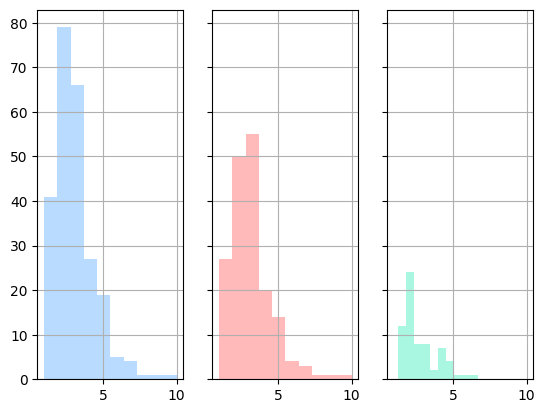

In [24]:
# display 3 histogram (common, dinner & other meal) side-by-side , sharing x-axis and sharing y-axis:
fig, axs = plt.subplots(1,3, sharex='all', sharey=True)

data_dinner = dinner_df.tip
data_other_meal = other_meal_df.tip

data1.hist(ax=axs[0], color='#74b9ff', alpha=0.5)
data_dinner.hist(ax=axs[1], color='#ff7675', alpha=0.5)
data_other_meal.hist(ax=axs[2], color='#55efc4', alpha=0.5)

<Axes: >

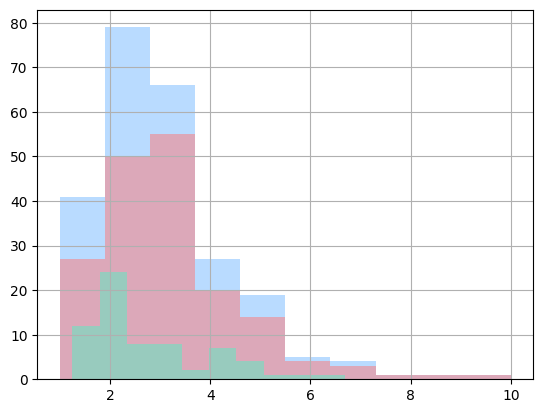

In [25]:
data1.hist(color='#74b9ff', alpha=0.5)
data_dinner.hist(color='#ff7675', alpha=0.5)
data_other_meal.hist(color='#55efc4', alpha=0.5)

Perform the same steps based on the column **time**.

Insight: Customers of this restaurant tend to give more tip for Dinner, in comparison to other meals of a day. Restaurant owner can think about methods to increase the customer experience or service quality for other meals of day to increase the tipping.